In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
igre = pd.read_csv('csvji/podatki.csv', index_col='stevilka')
ocene = pd.read_json("jsoni/ocene.json")
nekaj = pd.read_csv('csvji/igre.csv')

In [187]:
igre['Metascore'] = ocene['Metascore']
igre['Ocena_uporabnikov'] = ocene['ocena_uporabnikov']

In [188]:
igre['ESBR'] = nekaj['esbr']
igre['Založnik'] = nekaj['Zaloznik']
igre['1.žanr'] = nekaj['zanr1']
igre['2.žanr'] = nekaj['zanr2']
igre['Založnik'] = igre['Založnik'].replace('Electronic', 'EA')
igre['Založnik'] = igre['Založnik'].replace('Intelligent', 'Intelligent Systems')
igre['Založnik'] = igre['Založnik'].replace('Q', 'Q Entertainment')


In [189]:
igre[igre['Založnik']=='Q Entertainment'].count()

url_do_igre          32
konzola              32
naslov               32
Datum_izdaje         32
povzetek             32
Metascore            32
Ocena_uporabnikov    32
ESBR                 22
Založnik             32
1.žanr               32
2.žanr               32
dtype: int64

In [190]:
zamenjaj = {'pc':'PC', 'nintendo-64':'Nintendo 64', 'playstation':'Playstation', 'playstation-3':'Playstation 3', 'dreamcast':'Dreamcast', 
           'xbox-360':'Xbox 360', 'wii':'Wii', 'switch':'Switch', 'playstation-2':'Playstation 2', 'playstation-4':'Playstation 4', 
           'gamecube':'Gamecube','xbox':'Xbox', 'wii-u':'Wii U', 'game-boy-advance':'Game Boy Advance', '3ds':'Nintendo 3DS','ds':'Nintendo DS',
           'playstation-vita':'Playstation Vita', 'psp':'PSP', 'xbox-one':'Xbox One'}

In [192]:
igre = igre.replace({'konzola':zamenjaj})
igre = igre[igre['Ocena_uporabnikov']!='tbd']

In [7]:
igre = igre.drop(columns='url_do_igre')

In [8]:
igre = igre[:16500]

In [9]:
igre[igre['naslov'] == 'Counter-Strike: Global Offensive']

,konzola,naslov,Datum_izdaje,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr
stevilka,,,,,,,,,,
2543.0,PC,Counter-Strike: Global Offensive,"August 21, 2012",Counter-Strike: Global Offensive features new ...,83.0,7.7,M,Capcom,Action Adventure,Survival
3928.0,Playstation 3,Counter-Strike: Global Offensive,"August 21, 2012",Counter-Strike: Global Offensive features new ...,80.0,7.6,E,EA,Sim,Sim
4266.0,Xbox 360,Counter-Strike: Global Offensive,"August 22, 2012",Counter-Strike: Global Offensive features new ...,79.0,8.2,T,Raven,Role-Playing,Action RPG


In [172]:
igre['Metascore'] = pd.to_numeric(igre['Metascore'])
igre['Ocena_uporabnikov'] = pd.to_numeric(igre['Ocena_uporabnikov'])
igre['Skupna ocena'] = igre['Metascore'] + igre['Ocena_uporabnikov']*10
igre

,konzola,naslov,Datum_izdaje,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum
stevilka,,,,,,,,,,,,
1.0,Nintendo 64,The Legend of Zelda: Ocarina of Time,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",98.0,7.5,E,Nintendo,Action Adventure,Fantasy,173.0,1998-11-23
2.0,Playstation,Tony Hawk's Pro Skater 2,"September 20, 2000",As most major publishers' development efforts ...,98.0,7.5,T,Neversoft,Alternative,Skateboarding,173.0,2000-09-20
3.0,Playstation 3,Grand Theft Auto IV,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98.0,8.6,M,Rockstar,Modern,Open-World,184.0,2008-04-29
4.0,Dreamcast,SoulCalibur,"September 8, 1999","This is a tale of souls and swords, transcendi...",98.0,7.9,T,Namco,Fighting,3D,177.0,1999-09-08
5.0,Xbox 360,Grand Theft Auto IV,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,97.0,9.0,M,Rockstar,Modern,Open-World,187.0,2008-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...
16496.0,Xbox 360,Teenage Mutant Ninja Turtles: Out of the Shadows,"August 28, 2013","The oldest brother, Leonardo is the leader of ...",38.0,3.2,T,Mastiff,First-Person,Arcade,70.0,2013-08-28
16497.0,Wii,Naruto Shippuden: Dragon Blade Chronicles,"November 12, 2010",Take control of both Naruto and Sasuke as they...,38.0,3.0,T,Black,Action Adventure,Sci-Fi,68.0,2010-11-12
16498.0,Xbox 360,Vampire Rain,"July 3, 2007",You are a part of a Special Forces team tasked...,38.0,5.5,T,Bandai,Fighting,3D,93.0,2007-07-03


In [11]:
igre['Datum'] = pd.to_datetime(igre['Datum_izdaje'])


In [12]:
igre.drop(columns='Datum_izdaje')

,konzola,naslov,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum
stevilka,,,,,,,,,,,
1.0,Nintendo 64,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, ...",98.0,7.5,E,Nintendo,Action Adventure,Fantasy,173.0,1998-11-23
2.0,Playstation,Tony Hawk's Pro Skater 2,As most major publishers' development efforts ...,98.0,7.5,T,Neversoft,Alternative,Skateboarding,173.0,2000-09-20
3.0,Playstation 3,Grand Theft Auto IV,[Metacritic's 2008 PS3 Game of the Year; Also ...,98.0,8.6,M,Rockstar,Modern,Open-World,184.0,2008-04-29
4.0,Dreamcast,SoulCalibur,"This is a tale of souls and swords, transcendi...",98.0,7.9,T,Namco,Fighting,3D,177.0,1999-09-08
5.0,Xbox 360,Grand Theft Auto IV,[Metacritic's 2008 Xbox 360 Game of the Year; ...,97.0,9.0,M,Rockstar,Modern,Open-World,187.0,2008-04-29
...,...,...,...,...,...,...,...,...,...,...,...
16496.0,Xbox 360,Teenage Mutant Ninja Turtles: Out of the Shadows,"The oldest brother, Leonardo is the leader of ...",38.0,3.2,T,Mastiff,First-Person,Arcade,70.0,2013-08-28
16497.0,Wii,Naruto Shippuden: Dragon Blade Chronicles,Take control of both Naruto and Sasuke as they...,38.0,3.0,T,Black,Action Adventure,Sci-Fi,68.0,2010-11-12
16498.0,Xbox 360,Vampire Rain,You are a part of a Special Forces team tasked...,38.0,5.5,T,Bandai,Fighting,3D,93.0,2007-07-03


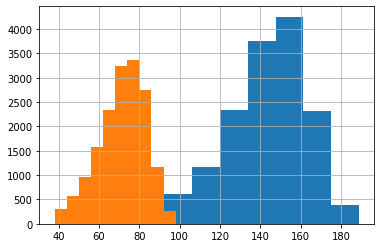

In [13]:
igre['Skupna ocena'].hist()
igre['Metascore'].hist()

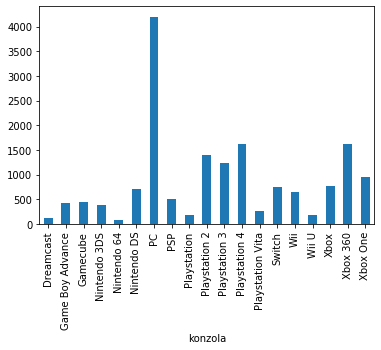

In [14]:
konzole = igre.groupby('konzola').size()
konzole.plot.bar()

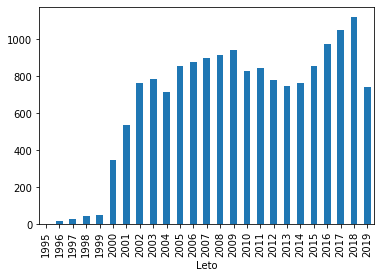

In [128]:
vsota = igre.groupby(igre['Datum'].dt.year.rename('Leto')).count()
vsota['Datum'].plot.bar()

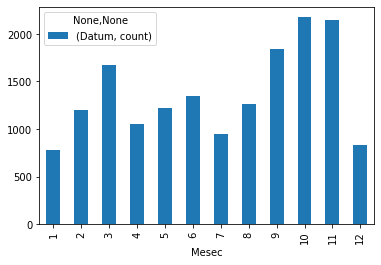

In [16]:
sumarija = igre.groupby([igre['Datum'].dt.month.rename('Mesec')]).agg({'count'})[['Datum']]
sumarija.plot.bar()

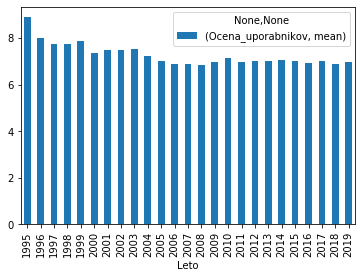

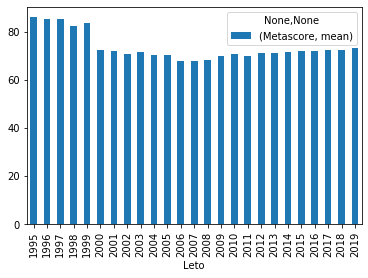

In [50]:
igre1 = igre.drop(columns='Skupna ocena')
igre2 = igre1.drop(columns='Metascore')
igre3 = igre1.drop(columns='Ocena_uporabnikov')
igre2.groupby([igre['Datum'].dt.year.rename('Leto')]).agg({'mean'}).plot.bar()
igre3.groupby([igre['Datum'].dt.year.rename('Leto')]).agg({'mean'}).plot.bar()

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True

,konzola,naslov,Datum_izdaje,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum
stevilka,,,,,,,,,,,,
732.0,Xbox 360,BioShock 2,"February 9, 2010",Set approximately 10 years after the events of...,88.0,8.3,M,2K,Sci-Fi,Arcade,171.0,2010-02-09
827.0,Playstation 3,BioShock 2,"February 9, 2010",Set approximately 10 years after the events of...,88.0,7.9,M,2K,Sci-Fi,Arcade,167.0,2010-02-09
830.0,PC,BioShock 2,"February 9, 2010",Set approximately 10 years after the events of...,88.0,8.9,M,2K,Sci-Fi,Arcade,177.0,2010-02-09
1726.0,Xbox One,NBA 2K18,"September 15, 2017",The highest rated* annual sports title of this...,85.0,8.0,NaN,2K,Basketball,Sim,165.0,2017-09-15
1825.0,PC,Rakuen,"May 10, 2017",Rakuen is a story-based adventure game about a...,84.0,8.7,M,2K,First-Person,Arcade,171.0,2017-05-10
1846.0,PC,Tales From The Borderlands: Episode 1 - Zer0 Sum,"November 25, 2014",Episode 1 - Zer0 Sum - Set following the event...,84.0,8.3,E,2K,Tennis,Tennis,167.0,2014-11-25
2086.0,PC,Project CARS 2,"September 21, 2017",Project CARS 2 is the next evolution in the aw...,84.0,8.4,M,2K,First-Person,Arcade,168.0,2017-09-21
2179.0,Playstation Vita,Hakuoki: Kyoto Winds,"May 16, 2017",The remastered telling of the visual novel Hak...,83.0,7.5,NaN,2K,Ice Hockey,Sim,158.0,2017-05-16
2595.0,Xbox One,Super Hydorah,"September 20, 2017",Super Hydorah is a nonlinear horizontal shoot ...,82.0,8.7,M,2K,Sci-Fi,Arcade,169.0,2017-09-20


In [18]:
(igre.groupby(['1.žanr']).size() + igre.groupby(['2.žanr']).size()).sum()



26064.0

In [19]:
igre.groupby(['2.žanr', '1.žanr']).size()


2.žanr         1.žanr      
2D             2D              326
               3D                6
               Action          106
               Action RPG        6
               Compilation      12
                              ... 
Western-Style  Role-Playing    110
               Third-Person      1
Wrestling      3D                1
               Combat           56
               Fighting         46
Length: 545, dtype: int64

In [20]:
igre[igre['Založnik'] == 'The'].groupby(['Založnik']).size()

Založnik
The    119
dtype: int64

In [21]:
igre.groupby(['1.žanr', '2.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation']).sort_values()


1.žanr                 2.žanr     
Massively Multiplayer  Modern           1
Party                  Compilation      1
Sim                    Arcade           1
                       Management       1
                       Team             1
                                     ... 
Action Adventure       General        333
Sim                    Sim            336
Role-Playing           Action RPG     373
Sci-Fi                 Arcade         375
Platformer             2D             547
Length: 439, dtype: int64

In [22]:
vsota1 =  igre.groupby(['1.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])
vsota1

1.žanr
Action               582
Action Adventure    1172
Action RPG           264
Adventure            346
Alternative          129
                    ... 
WWII                  34
Wakeboarding           1
Wargame                6
Western-Style          1
Wrestling              2
Length: 125, dtype: int64

In [54]:
vsota2 = igre.groupby(['2.žanr']).size().drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])
vsota2

2.žanr
4X                48
Action           137
Action RPG       645
Adventure         16
Application       12
                ... 
WWI                1
WWII              10
Wakeboarding       4
Western-Style    211
Wrestling        103
Length: 112, dtype: int64

In [55]:
vsota = vsota2.add(vsota1, fill_value=0)

In [56]:
ind = vsota > 300

In [57]:
vsota[ind]

Action               719.0
Action Adventure    1172.0
Action RPG           909.0
Adventure            362.0
Automobile           591.0
Combat               307.0
Fantasy             1057.0
Fighting             309.0
First-Person         651.0
Historic             532.0
Music                391.0
Open-World           401.0
Platformer           829.0
Puzzle               423.0
Racing               323.0
Role-Playing         844.0
Sci-Fi              1016.0
Sim                 1104.0
Survival             334.0
Third-Person         473.0
dtype: float64

In [27]:
vsota.drop(labels=['3D', '2D', 'General'])

4X                    48.0
Action               719.0
Action Adventure    1172.0
Action RPG           909.0
Adventure            362.0
                     ...  
WWII                  44.0
Wakeboarding           5.0
Wargame                6.0
Western-Style        212.0
Wrestling            105.0
Length: 146, dtype: float64

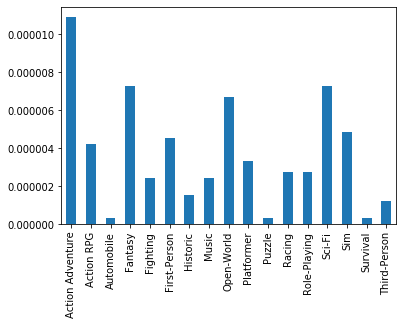

In [159]:
vsotaa = vsota/16500
vsotaa.drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])[ind].plot.bar()



                konzola                              naslov  \
stevilka                                                      
23.0                 PC                         Half-Life 2   
30.0           Xbox 360                      The Orange Box   
31.0                 PC                      The Orange Box   
37.0                 PC                           Half-Life   
59.0                 PC                            Portal 2   
61.0           Xbox 360                            Portal 2   
63.0      Playstation 3                            Portal 2   
204.0                PC                     Team Fortress 2   
374.0              Xbox                         Half-Life 2   
406.0                PC                              Portal   
431.0          Xbox 360                 Portal: Still Alive   
432.0                PC            Half-Life 2: Episode Two   
472.0                PC                              Dota 2   
550.0          Xbox 360                       Left 4 De

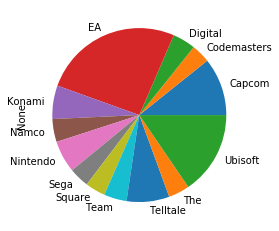

In [29]:
zaloz = igre.groupby(['Založnik']).size()
zaloz[zaloz>100].plot.pie()
igre[igre['Založnik'] == 'Valve'] 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(igre[igre['Založnik'] == 'Valve'] )

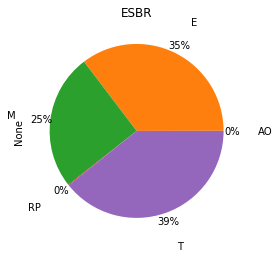

In [62]:
igre.groupby('ESBR').size().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.4, title='ESBR')

In [31]:
prava = igre.sort_values('Skupna ocena', ascending= False)

In [32]:
igre[igre['Založnik']=='Valve'].count()

konzola              28
naslov               28
Datum_izdaje         28
povzetek             28
Metascore            28
Ocena_uporabnikov    28
ESBR                 22
Založnik             28
1.žanr               28
2.žanr               28
Skupna ocena         28
Datum                28
dtype: int64

In [140]:
felc = igre[igre['Založnik']=='Zen'].groupby('Založnik').mean()

zal = zaloz[zaloz>27].reset_index()
for zaloznik in zal['Založnik']:
    felc = felc.append(igre[igre['Založnik']==zaloznik].groupby('Založnik').mean())
felc = felc.sort_values('Skupna ocena', ascending=False)
felc.head(30)
felc['Metascore']

Založnik
Valve                  86.821429
Rockstar               83.739726
Intelligent Systems    82.194444
Rare                   79.303030
Blizzard               86.435897
                         ...    
THQ                    63.619048
Blitz                  60.868421
Artificial             57.245614
Amaze                  60.892857
Heavy                  58.750000
Name: Metascore, Length: 109, dtype: float64

In [34]:
E = igre.mean()
D = igre.std()

In [193]:
igre.describe(percentiles=[.25, .5, .75])


,Metascore
count,15399.000000
mean,71.208065
std,12.063114
min,31.000000
25%,64.000000
50%,73.000000
75%,80.000000
max,98.000000


In [171]:
igre[igre['Ocena_uporabnikov']=='tbd']

,konzola,naslov,Datum_izdaje,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr,Skupna ocena,Datum
stevilka,,,,,,,,,,,,


In [132]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def color_positive_green(val):
    color = 'green' if val > 80 else 'black'
    return 'color: %s' % color
felc = felc.reset_index(drop=True).style.apply(color_positive_green)


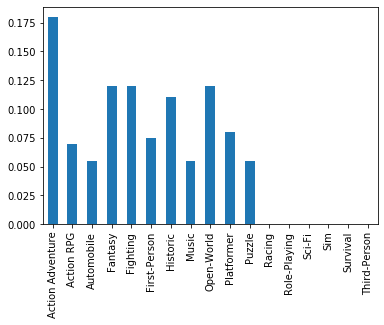

In [160]:
top200 = igre[:200]
top200

vsota1 =  top200.groupby(['1.žanr']).size()
vsota2 = top200.groupby(['2.žanr']).size()
vsota = vsota2.add(vsota1, fill_value=0)
vsota = vsota/200
vsota[vsota>0.05].drop(labels=['3D', '2D', 'General', 'Modern']).plot.bar()
vsotaa.drop(labels=['3D', '2D', 'General', 'Modern', 'Arcade', 'Compilation'])[ind].plot.bar()

In [216]:
igre.sort_values('Ocena_uporabnikov', ascending=False)

,url_do_igre,konzola,naslov,Datum_izdaje,povzetek,Metascore,Ocena_uporabnikov,ESBR,Založnik,1.žanr,2.žanr,razlika
stevilka,,,,,,,,,,,,
109.0,/game/nintendo-64/super-mario-64,Nintendo 64,Super Mario 64,"September 26, 1996",Mario is super in a whole new way! Combining t...,93.0,9.4,E,Nintendo,Platformer,3D,686.0
286.0,/game/playstation-2/ratchet-clank-up-your-arsenal,Playstation 2,Ratchet & Clank: Up Your Arsenal,"November 3, 2004","(Also known as ""Ratchet & Clank 3"") The third...",91.0,9.2,T,Insomniac,Platformer,3D,1008.0
94.0,/game/dreamcast/jet-grind-radio,Dreamcast,Jet Grind Radio,"October 30, 2000","Join a graffiti crew, stamp your territory and...",94.0,9.2,T,Smilebit,Platformer,3D,255.0
252.0,/game/game-boy-advance/metroid-fusion,Game Boy Advance,Metroid Fusion,"November 17, 2002","While lending mission support on planet SR388,...",92.0,9.2,E,Nintendo,Action Adventure,Sci-Fi,5529.0
108.0,/game/playstation-2/virtua-fighter-4,Playstation 2,Virtua Fighter 4,"March 17, 2002",Two new characters (Lei Fei and Vanessa Lewis)...,94.0,9.2,T,Sega,Fighting,3D,691.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16282.0,/game/xbox-360/mindjack,Xbox 360,Mindjack,"January 18, 2011","With this unique action shooter set in 2031, S...",43.0,0.8,T,M4,Platformer,2D,149.0
5279.0,/game/pc/galactic-civilizations-altarian-prophecy,PC,Galactic Civilizations: Altarian Prophecy,"November 12, 2004",Galactic Civilizations: Altarian Prophecy is a...,77.0,0.7,E,Visual,Basketball,Sim,3679.0
4140.0,/game/switch/valfaris,Switch,Valfaris,"October 10, 2019","Set in a far corner of space, Valfaris is a he...",80.0,0.7,E,Visual,Basketball,Sim,2907.0


In [206]:
igre['razlika']  =abs(igre.sort_values('Ocena_uporabnikov', ascending = False).index - igre.index)
igre['razlika'].mean()

3599.110779220779

In [210]:
def razlika (k):
    return igre['razlika'][:k].mean()

x = []
y = []

for k in range(0,16500):
    x = x.append(k)
    y = y.append(razlika(k))
    

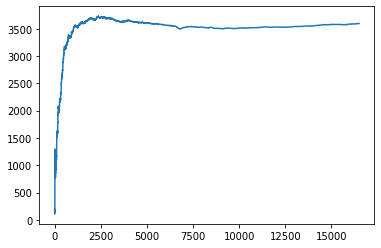

In [212]:
plt.plot(x,y)

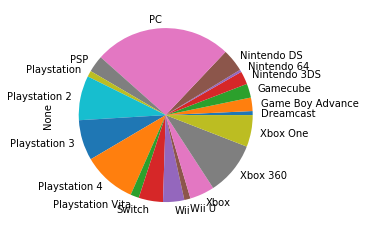

In [215]:
igre.groupby('konzola').size().plot.pie()